Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

1. Get the numerical variables from our dataset.

In [7]:
numerical = data.select_dtypes(np.number)
numerical

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

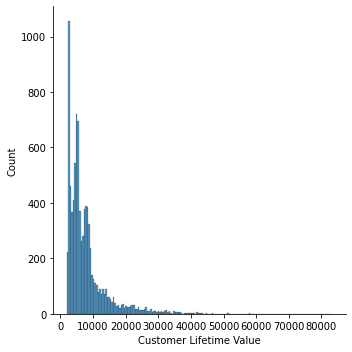

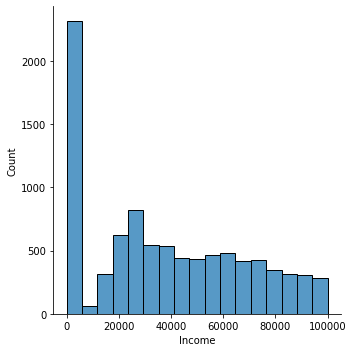

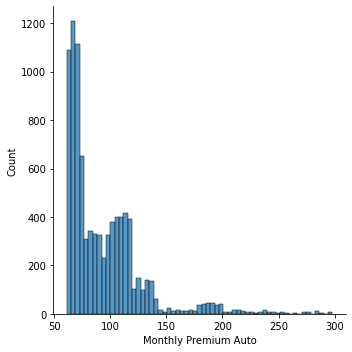

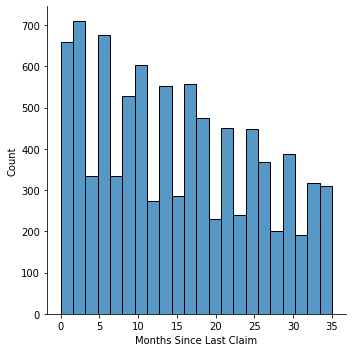

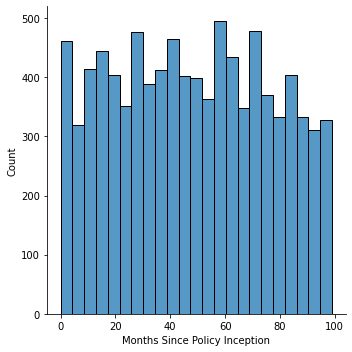

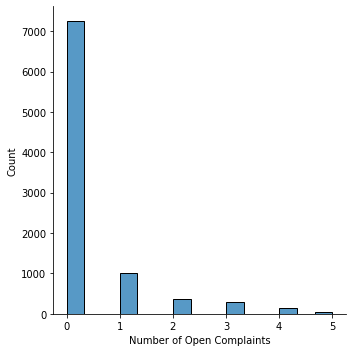

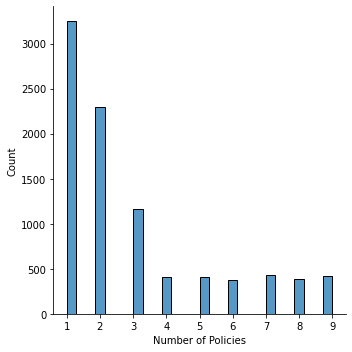

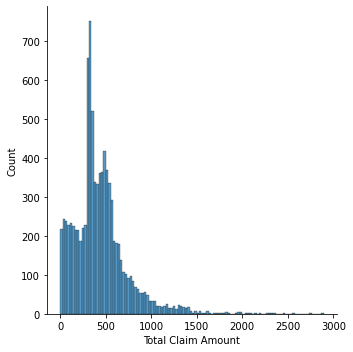

In [10]:
for c in list(numerical.columns):
    sns.displot(numerical[c])
    plt.show()

Customer Lifetime Value - exponential
Income - kind of normal, but with many 0 values, large standard deviation, and right skew
Monthly Premium auto - appears exponential
Months since last claim - neither normal nor exponential
Months since policy inception - neither normal nor exponential
Number of open complaints - exponential
Number of policies - neither normal nor exponential
Total Claim Amount - slightly exponential?

3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [ ]:
log transform
minmaxscaler
standardscaler

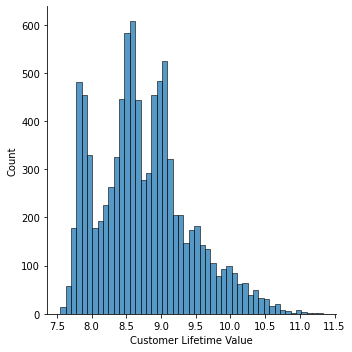

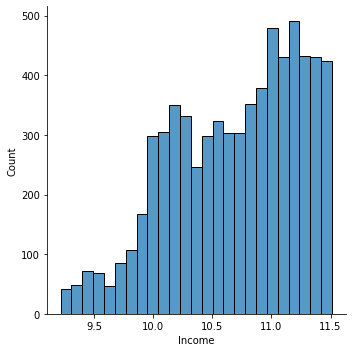

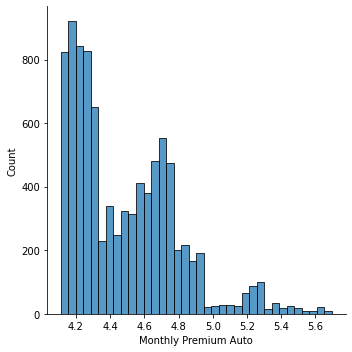

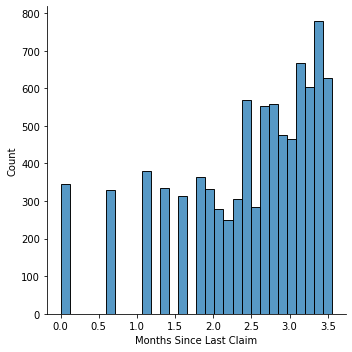

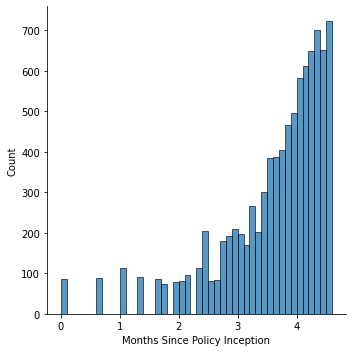

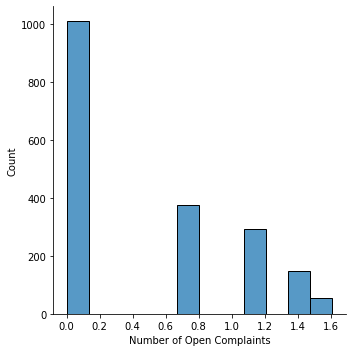

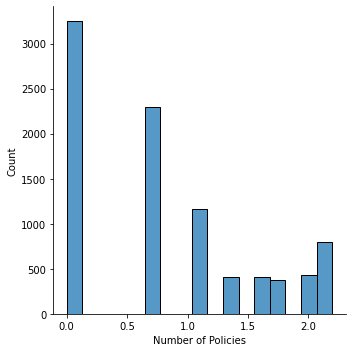

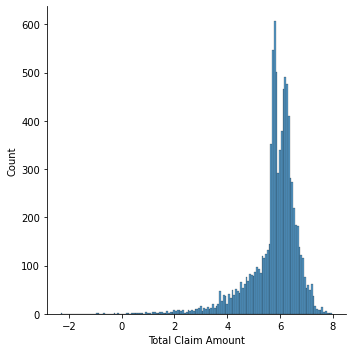

In [13]:
#log transform
def log_transfom(x):   
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN
    
log_numerical = numerical.copy()

for c in log_numerical.columns:
    log_numerical[c] = log_numerical[c].apply(log_transfom)
    sns.displot(log_numerical[c])
    plt.show()
    

Customer Lifetime Value - now looks slightly more normal
Income - not normal or exponential distribution
Monthly Premium auto - not exponential or normal 
Months since last claim - not exponential or normal 
Months since policy inception - neither normal nor exponential
Number of open complaints - neither normal nor exponential
Number of policies - neither normal nor exponential
Total Claim Amount - somewhat normal with small stand deviation and left skew

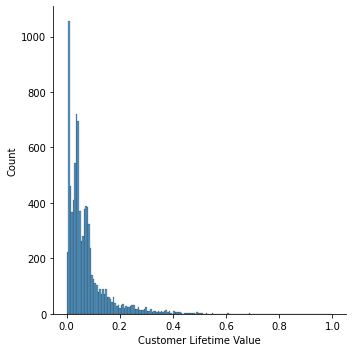

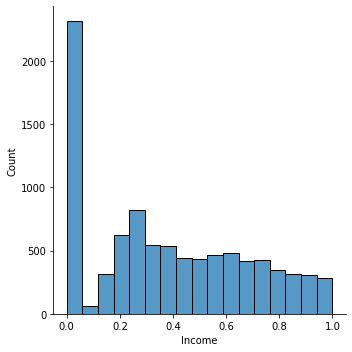

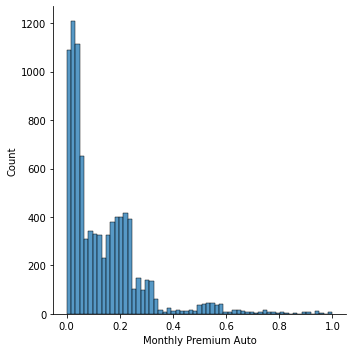

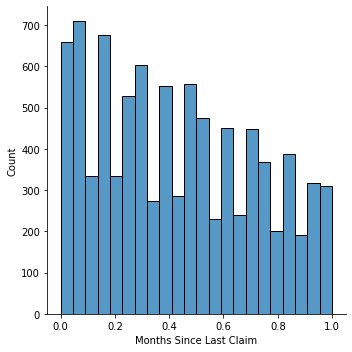

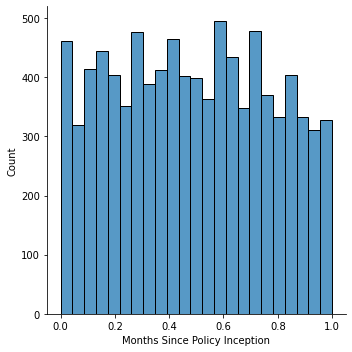

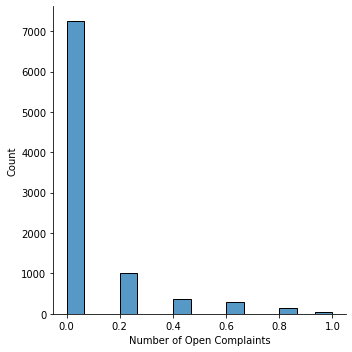

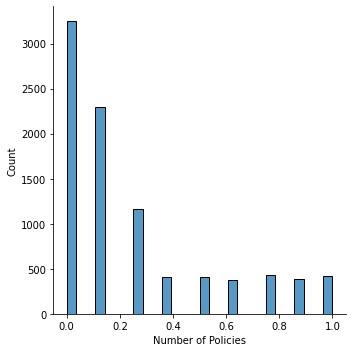

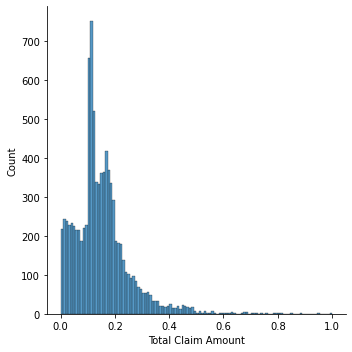

In [15]:
# MinMaxscaler
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(numerical)
n_normalized = pd.DataFrame(transformer.transform(numerical), columns=numerical.columns)

for c in n_normalized.columns:
    sns.displot(n_normalized[c])
    plt.show()

After applying StandarScaler, all features have the same distributions as untransformed data, just different scales.

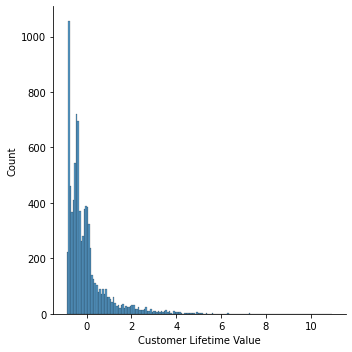

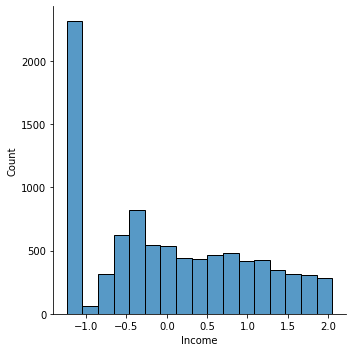

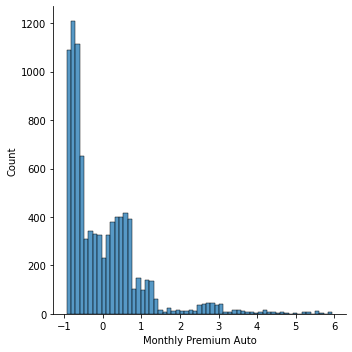

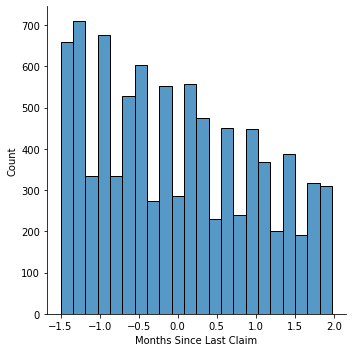

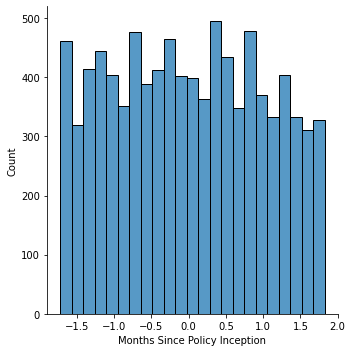

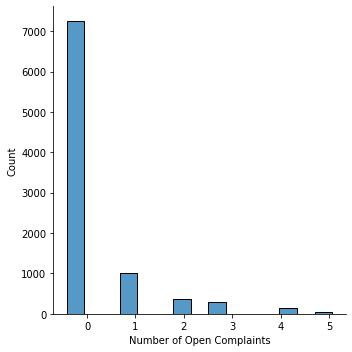

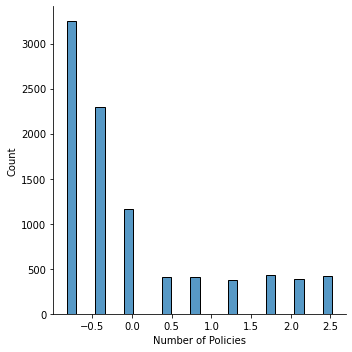

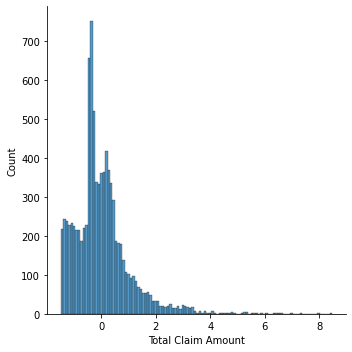

In [17]:
# StandardScaler

from sklearn.preprocessing import StandardScaler
transformer2 = StandardScaler().fit(numerical)
n_standardized = pd.DataFrame(transformer2.transform(numerical), columns=numerical.columns)

for c in n_standardized.columns:
    sns.displot(n_standardized[c])
    plt.show()


After applying StandarScaler, all features have the same distributions as untransformed data, just different scales.